### Importing the libraries

In [52]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.12.0'

## Part 1 - Data Preprocessing

In [3]:
with open('Dataset/andhra.geojson') as f:
    data = json.load(f)

In [4]:
features = data['features']

# Extracting the 'geometry' and 'properties' data from each feature.
geometries = [feature['geometry'] for feature in features]
properties = [feature['properties'] for feature in features]

# Convert the lists of geometries and properties to pandas DataFrames.
df1_geometries = pd.DataFrame(geometries)
df1_properties = pd.DataFrame(properties)

In [5]:
df1_geometries

,type,coordinates
0,Polygon,"[[[81.82451255693135, 17.411018377030054], [81..."
1,Polygon,"[[[81.82385511688355, 17.411244985301916], [81..."
2,Polygon,"[[[81.82429902246463, 17.41124466538737], [81...."
3,Polygon,"[[[81.82370156042133, 17.411375830207582], [81..."
4,Polygon,"[[[81.82379376135411, 17.4115639395899], [81.8..."
...,...,...
123,Polygon,"[[[81.82469464828425, 17.414002625839718], [81..."
124,Polygon,"[[[81.82477746148544, 17.414022140317112], [81..."
125,Polygon,"[[[81.82475801547082, 17.414304620140154], [81..."
126,Polygon,"[[[81.82449549426968, 17.414406351158778], [81..."


In [6]:
df1_properties

,id,class_id,density
0,53861968,00m-04m,None
1,53861969,00m-04m,None
2,53861970,00m-04m,None
3,53861971,00m-04m,None
4,53861972,00m-04m,None
...,...,...,...
123,53862091,04m-10m,dense
124,53862092,04m-10m,dense
125,53862093,04m-10m,dense
126,53862094,04m-10m,dense


In [7]:
# Concatenating the DataFrames
df1 = pd.concat([df1_geometries, df1_properties], axis=1)
df1

,type,coordinates,id,class_id,density
0,Polygon,"[[[81.82451255693135, 17.411018377030054], [81...",53861968,00m-04m,None
1,Polygon,"[[[81.82385511688355, 17.411244985301916], [81...",53861969,00m-04m,None
2,Polygon,"[[[81.82429902246463, 17.41124466538737], [81....",53861970,00m-04m,None
3,Polygon,"[[[81.82370156042133, 17.411375830207582], [81...",53861971,00m-04m,None
4,Polygon,"[[[81.82379376135411, 17.4115639395899], [81.8...",53861972,00m-04m,None
...,...,...,...,...,...
123,Polygon,"[[[81.82469464828425, 17.414002625839718], [81...",53862091,04m-10m,dense
124,Polygon,"[[[81.82477746148544, 17.414022140317112], [81...",53862092,04m-10m,dense
125,Polygon,"[[[81.82475801547082, 17.414304620140154], [81...",53862093,04m-10m,dense
126,Polygon,"[[[81.82449549426968, 17.414406351158778], [81...",53862094,04m-10m,dense


In [8]:
with open('Dataset/turahalli.geojson') as f:
    data = json.load(f)

In [9]:
# GeoJSON contains a 'features' key that holds the actual data.
features = data['features']

# Extracting the 'geometry' and 'properties' data from each feature.
geometries = [feature['geometry'] for feature in features]
properties = [feature['properties'] for feature in features]

# Convert the lists of geometries and properties to pandas DataFrames.
df2_geometries = pd.DataFrame(geometries)
df2_properties = pd.DataFrame(properties)

In [10]:
# Concatenate the DataFrames
df2 = pd.concat([df2_geometries, df2_properties], axis=1)
df2

,type,coordinates,id,class_id,density
0,Polygon,"[[[77.5223341583224, 12.880530379545148], [77....",53863076,00m-04m,None
1,Polygon,"[[[77.52142623059096, 12.880528745319213], [77...",53863077,00m-04m,None
2,Polygon,"[[[77.52751182741297, 12.880534628411851], [77...",53863078,00m-04m,None
3,Polygon,"[[[77.52447757854101, 12.880529398979508], [77...",53863079,00m-04m,None
4,Polygon,"[[[77.52866651836628, 12.880536262613578], [77...",53863080,00m-04m,None
...,...,...,...,...,...
347,Polygon,"[[[77.52724125958535, 12.882158688922033], [77...",53863423,10m-99m,sparse
348,Polygon,"[[[77.52562087010483, 12.882337142101578], [77...",53863424,10m-99m,sparse
349,Polygon,"[[[77.52770595228546, 12.882685550323837], [77...",53863425,10m-99m,sparse
350,Polygon,"[[[77.52751585072645, 12.883009118501034], [77...",53863426,10m-99m,sparse


#### Plotting the Coordinates

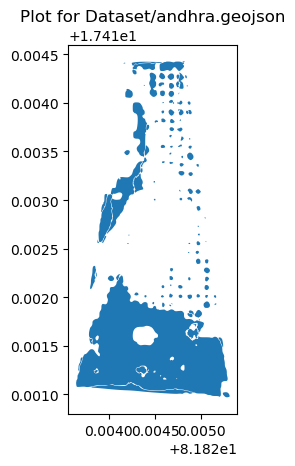

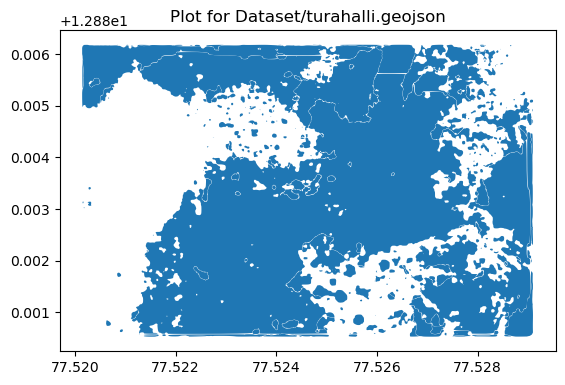

In [11]:
import geopandas as gpd

# List of file paths for the GeoJSON files
file_paths = [
    'Dataset/andhra.geojson',
    'Dataset/turahalli.geojson',
]

# Loop through each file and create separate plots
for file_path in file_paths:
    # Read the GeoJSON data using geopandas
    gdf = gpd.read_file(file_path)

    # Create a plot for the GeoJSON data
    fig, ax = plt.subplots()

    # Plot the GeoJSON data on the map
    gdf.plot(ax=ax)

    # Set the plot title
    plt.title(f"Plot for {file_path}")
    
    # Save the plot as an image
    image_filename = file_path.replace('.geojson', '.png')
    plt.savefig(image_filename)

    # Show the plot
    plt.show()
    plt.close()

In [12]:
gdf

,id,class_id,density,geometry
0,53863076,00m-04m,NaN,"POLYGON ((77.52233 12.88053, 77.52241 12.88053..."
1,53863077,00m-04m,NaN,"POLYGON ((77.52143 12.88053, 77.52148 12.88053..."
2,53863078,00m-04m,NaN,"POLYGON ((77.52751 12.88053, 77.52751 12.88054..."
3,53863079,00m-04m,NaN,"POLYGON ((77.52448 12.88053, 77.52449 12.88053..."
4,53863080,00m-04m,NaN,"POLYGON ((77.52867 12.88054, 77.52866 12.88054..."
...,...,...,...,...
347,53863423,10m-99m,sparse,"POLYGON ((77.52724 12.88216, 77.52724 12.88216..."
348,53863424,10m-99m,sparse,"POLYGON ((77.52562 12.88234, 77.52562 12.88234..."
349,53863425,10m-99m,sparse,"POLYGON ((77.52771 12.88269, 77.52770 12.88268..."
350,53863426,10m-99m,sparse,"POLYGON ((77.52752 12.88301, 77.52752 12.88301..."


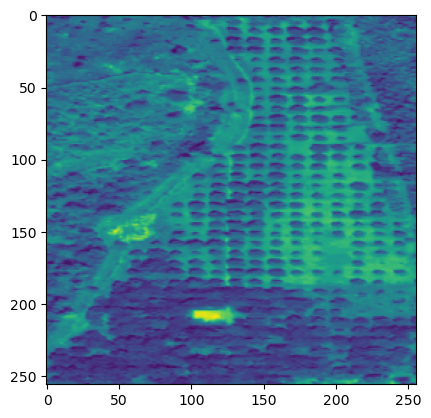

In [13]:
import cv2
 
# The function cv2.imread() is used to read training image.
img = cv2.imread('/home/rijul/Desktop/Projects new/Google_tree_segmentation/train/1.png',0)
img = cv2.resize(img, (256, 256))

plt.imshow(img)
plt.show()

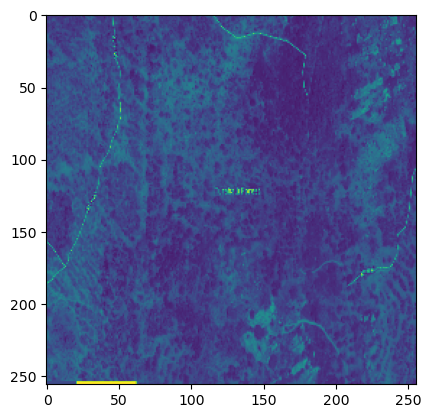

In [14]:
# The function cv2.imread() is used to read test image.
img = cv2.imread('/home/rijul/Desktop/Projects new/Google_tree_segmentation/test/2.png',0)
img = cv2.resize(img, (256, 256))

plt.imshow(img)
plt.show()

#### Plotting the tree annotations on the training and testing images

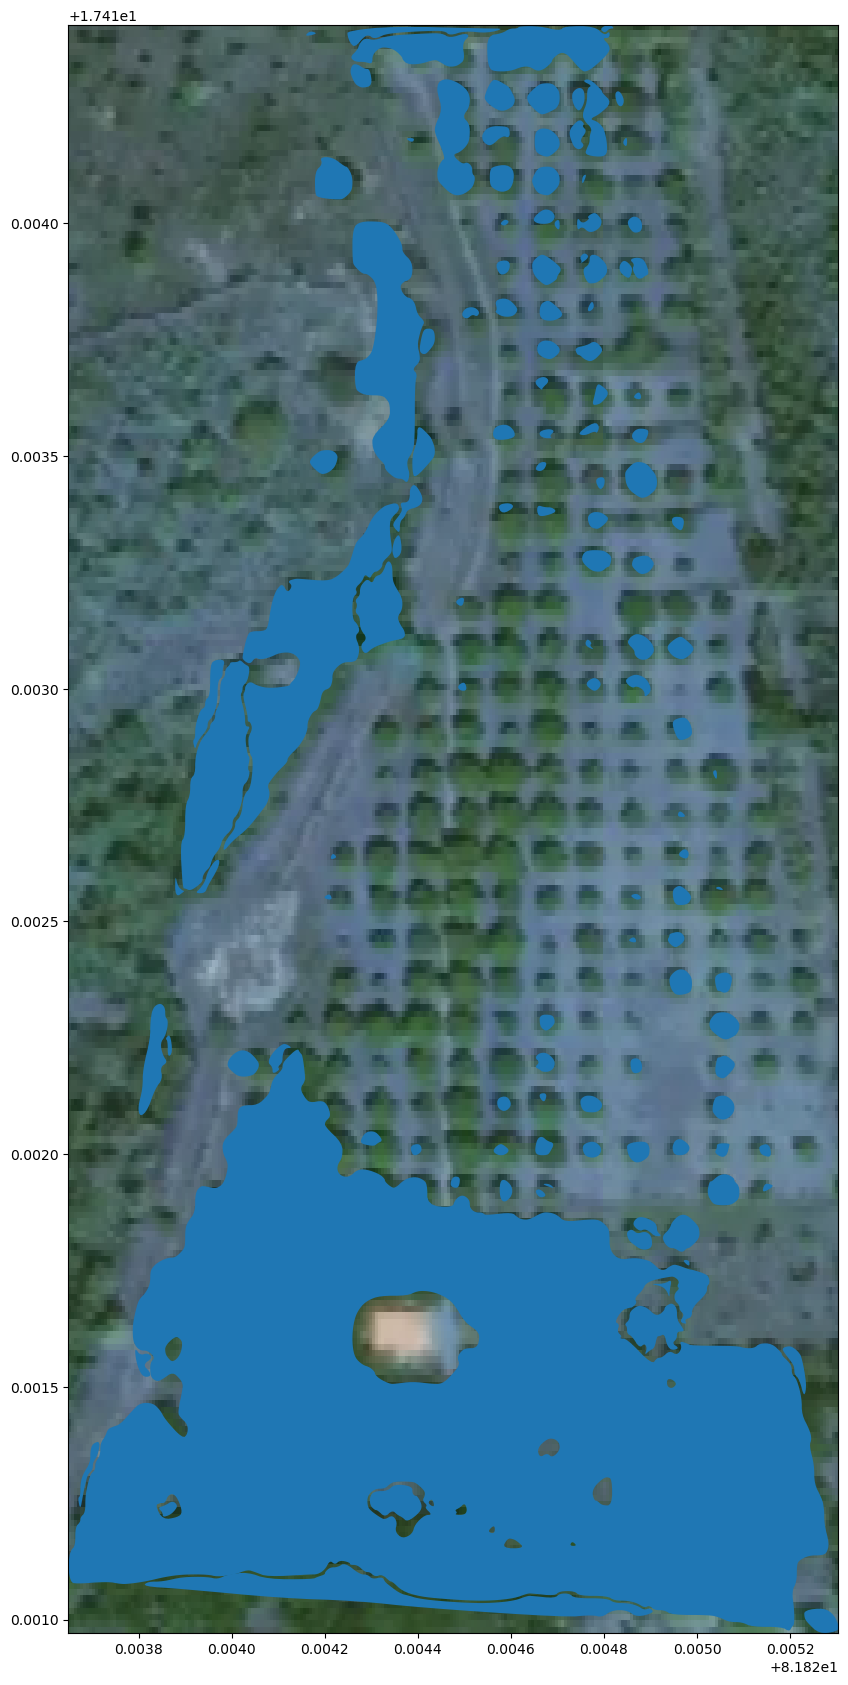

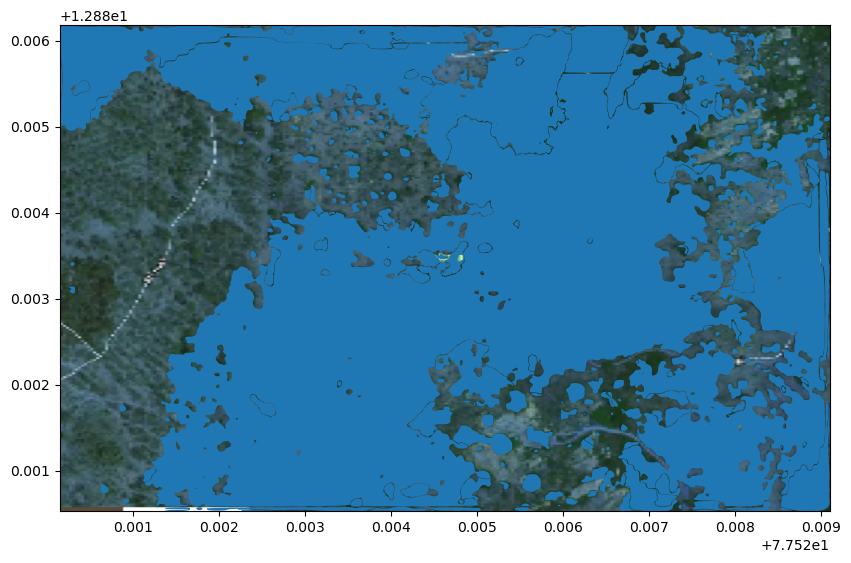

In [15]:
import matplotlib.image as mpimg
import matplotlib.patches as mpatches

# List of GeoJSON files path
file_paths = [
    'Dataset/andhra.geojson',
    'Dataset/turahalli.geojson',
]

# File paths for the images
image_paths = [
    './train/1.png',
    './test/2.png',
]

# Loop through each file and create separate plots
for file_path, image_path in zip(file_paths, image_paths):
    # Read the GeoJSON data using geopandas
    gdf = gpd.read_file(file_path)

    # Read the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (256, 256))

    # Get the figure size based on the image size
    img_width = gdf.total_bounds[2] - gdf.total_bounds[0]
    img_height = gdf.total_bounds[3] - gdf.total_bounds[1]
    fig_width = 10
    fig_height = img_height / img_width * fig_width

    # Create a plot with the specified figure size
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))

    # Plot the GeoJSON data on the map
    gdf.plot(ax=ax)

    # Display the image on the plot
    plt.imshow(img, extent=[gdf.total_bounds[0], gdf.total_bounds[2], gdf.total_bounds[1], gdf.total_bounds[3]])

    # Show the plot with annotations
    plt.show()
    plt.close()


In [16]:
# Load training and testing images
train_image = cv2.imread("./train/1.png")
test_image = cv2.imread("./test/2.png")

# Resize training and testing images
train_image = cv2.resize(train_image, (256, 256))
test_image = cv2.resize(test_image, (256, 256))

In [17]:
df1['coordinates']

0      [[[81.82451255693135, 17.411018377030054], [81...
1      [[[81.82385511688355, 17.411244985301916], [81...
2      [[[81.82429902246463, 17.41124466538737], [81....
3      [[[81.82370156042133, 17.411375830207582], [81...
4      [[[81.82379376135411, 17.4115639395899], [81.8...
                             ...                        
123    [[[81.82469464828425, 17.414002625839718], [81...
124    [[[81.82477746148544, 17.414022140317112], [81...
125    [[[81.82475801547082, 17.414304620140154], [81...
126    [[[81.82449549426968, 17.414406351158778], [81...
127    [[[81.82455014427731, 17.414351646749243], [81...
Name: coordinates, Length: 128, dtype: object

In [18]:
df1['coordinates'].shape

(128,)

In [19]:
df1['coordinates'][0]

[[[81.82451255693135, 17.411018377030054],
  [81.82445794335294, 17.41102232484741],
  [81.82440161696222, 17.41102680363622],
  [81.82435534885582, 17.41103096251523],
  [81.82431913903501, 17.411034801491407],
  [81.82428225866147, 17.411038000638808],
  [81.82424470773552, 17.411040559957],
  [81.8242064862575, 17.411042479445637],
  [81.82416759422775, 17.411043759104295],
  [81.82412467888614, 17.41104599851093],
  [81.8240777402317, 17.411049197662948],
  [81.82402677826337, 17.41105335655765],
  [81.82397179297995, 17.411058475191886],
  [81.82392552487353, 17.41106263407433],
  [81.82388797394573, 17.41106583321093],
  [81.82385914019781, 17.411068072606604],
  [81.8238390236307, 17.411069352265084],
  [81.82382460675737, 17.411070951836766],
  [81.82381588957796, 17.41107287132293],
  [81.82381287209263, 17.411075110724337],
  [81.82381555430158, 17.41107767004117],
  [81.82381957761504, 17.411079589528928],
  [81.823824942033, 17.411080869187565],
  [81.82383164755544, 17.411

In [20]:
len(df1['coordinates'][0][0])

210

In [21]:
len(df1['coordinates'][0][0][0])

2

In [22]:
train_image.shape

(256, 256, 3)

### Mask for Train and Test image :

In [23]:
import rasterio
from rasterio.features import geometry_mask
from shapely.geometry import shape, Polygon

def geojson_to_binary_mask(geojson_path, image_shape):
    # Read GeoJSON file
    with open(geojson_path) as f:
        data = json.load(f)

    # Extract the polygon coordinates
    coordinates = data['features'][0]['geometry']['coordinates']

    # Create a shapely Polygon object
    polygon = Polygon(coordinates[0])

    # Convert coordinates to pixel positions
    minx, miny, maxx, maxy = polygon.bounds
    pixel_width = (maxx - minx) / image_shape[1]
    pixel_height = (maxy - miny) / image_shape[0]

    # Create an affine transform for rasterization
    transform = rasterio.Affine(pixel_width, 0, minx, 0, -pixel_height, maxy)

    # Create the binary mask by rasterizing the polygon
    mask = geometry_mask([polygon], out_shape=image_shape, transform=transform, invert=True)
    mask = np.flip(mask, axis=0)
    mask = np.flip(mask, axis=1)
    
    return mask.astype(np.uint8)

#Mask for Training image
geojson_file_path = 'Dataset/andhra.geojson'
image_shape = (256,256)
binary_mask = geojson_to_binary_mask(geojson_file_path, image_shape)

In [24]:
binary_mask.shape

(256, 256)

In [25]:
np.unique(binary_mask)

array([0, 1], dtype=uint8)

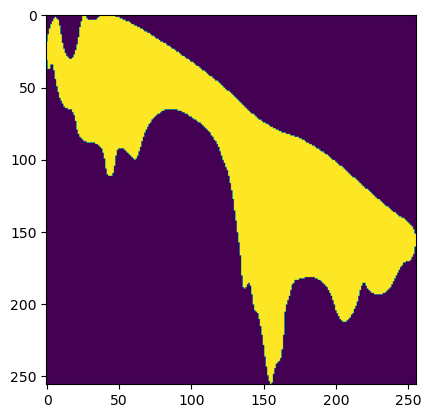

In [26]:
plt.imshow(binary_mask)
plt.show()

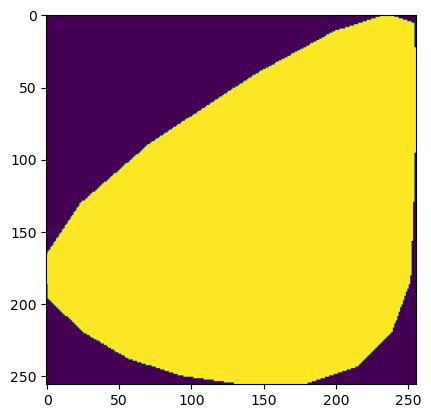

In [27]:
# Mask for test image
geojson_file_path2 = 'Dataset/turahalli.geojson'
image_shape = (256,256)
binary_mask2 = geojson_to_binary_mask(geojson_file_path2, image_shape)
plt.imshow(binary_mask2)
plt.show()

In [28]:
binary_mask2.shape

(256, 256)

## Part 2 - Model Selection

Reasons to use U-Net:<br>1. U-Net is a good choice because of its simplicity and efficiency. <br>2. U-Net can learn to capture fine-grained details in the single image, making it a strong candidate for single-image segmentation tasks.

In [53]:
# U-Net Model

import tensorflow as tf
from tensorflow.keras import layers

def double_conv_block(x, n_filters):
    # Conv2D then ReLU activation
    x = layers.Conv2D(n_filters, 3, padding="same", activation="relu", kernel_initializer="he_normal")(x)
    # Conv2D then ReLU activation
    x = layers.Conv2D(n_filters, 3, padding="same", activation="relu", kernel_initializer="he_normal")(x)
    return x

def downsample_block(x, n_filters):
    f = double_conv_block(x, n_filters)
    p = layers.MaxPool2D(2)(f)
    p = layers.Dropout(0.3)(p)
    return f, p

def upsample_block(x, conv_features, n_filters):
    # upsample
    x = layers.Conv2DTranspose(n_filters, 3, strides=2, padding="same")(x)

    # Ensuring that the spatial dimensions match before concatenation
    conv_features = tf.image.resize(conv_features, tf.shape(x)[1:3], method=tf.image.ResizeMethod.BILINEAR)

    # concatenate
    x = layers.concatenate([x, conv_features])

    # dropout
    x = layers.Dropout(0.3)(x)

    # Conv2D twice with ReLU activation
    x = double_conv_block(x, n_filters)
    return x

def build_unet_model():
    # inputs
    inputs = layers.Input(shape=(256, 256, 3))

    # encoder: contracting path - downsample
    f1, p1 = downsample_block(inputs, 32)
    f2, p2 = downsample_block(p1, 64)
    f3, p3 = downsample_block(p2, 128)
    f4, p4 = downsample_block(p3, 256)
    # bottleneck
    bottleneck = double_conv_block(p4, 512)
    
    # decoder: expanding path - upsample
    u6 = upsample_block(bottleneck, f4, 256)
    u7 = upsample_block(u6, f3, 128)
    u8 = upsample_block(u7, f2, 64)
    u9 = upsample_block(u8, f1, 32)
    
    # outputs
    outputs = layers.Conv2D(1, 1, padding="same", activation="sigmoid")(u9)

    # Resize the output to match the target mask's shape
    outputs = tf.image.resize(outputs, (256, 256), method=tf.image.ResizeMethod.BILINEAR)
    
    # unet model with Keras Functional API
    unet_model = tf.keras.Model(inputs, outputs, name="U-Net")
    return unet_model

unet_model = build_unet_model()

## Part 3 - Model Training

In [30]:
# Training

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Check the shape of your data
print("Shape of train_images:", train_image.shape)
print("Shape of train_masks:", binary_mask.shape)

# Reshape your data to add the batch dimension
train_images = np.expand_dims(train_image, axis=0)
train_masks = np.expand_dims(binary_mask, axis=0)

# Check the new shape of your data
print("New shape of train_images:", train_images.shape)
print("New shape of train_masks:", train_masks.shape)

# Data augmentation using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,           # Randomly rotate the images within the range (-20, 20) degrees
    zoom_range=0.2,              # Randomly zoom the images by a factor of up to 0.2
    horizontal_flip=True,        # Randomly flip the images horizontally
    vertical_flip=True,          # Randomly flip the images vertically
)

# Defining the number of augmented samples you want
num_augmented_samples = 10

# Creating an empty list to store augmented samples and masks
augmented_samples = []
augmented_masks = []

# Perform data augmentation
for _ in range(num_augmented_samples):
    # Get a random augmentation transformation for the current sample
    augmented_data = datagen.get_random_transform(train_images.shape[1:])

    # Augmenting the image
    augmented_image = datagen.apply_transform(train_images[0], augmented_data)
    
    # Augmenting the mask
    augmented_mask = datagen.apply_transform(np.expand_dims(train_masks[0], axis=-1), augmented_data)
    
    # Removing the additional channel dimension added
    augmented_mask = np.squeeze(augmented_mask, axis=-1)
    
    # Adding the augmented sample and mask to the list
    augmented_samples.append(augmented_image)
    augmented_masks.append(augmented_mask)

# Convert the lists to NumPy arrays
augmented_samples = np.array(augmented_samples)
augmented_masks = np.array(augmented_masks)

# Concatenate the original data with the augmented data
train_images_augmented = np.concatenate([train_images, augmented_samples], axis=0)
train_masks_augmented = np.concatenate([train_masks, augmented_masks], axis=0)

# Checking the new shape of augmented data
print("New shape of train_images_augmented:", train_images_augmented.shape)
print("New shape of train_masks_augmented:", train_masks_augmented.shape)

Shape of train_images: (256, 256, 3)
Shape of train_masks: (256, 256)
New shape of train_images: (1, 256, 256, 3)
New shape of train_masks: (1, 256, 256)
New shape of train_images_augmented: (11, 256, 256, 3)
New shape of train_masks_augmented: (11, 256, 256)


In [31]:
# Train the model with the augmented data
unet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
unet_model.fit(train_images_augmented, train_masks_augmented, epochs=10)

Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 7.7308 - accuracy: 0.4565
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 4.6217 - accuracy: 0.6970
Epoch 3/10
1/1 [==============================] - 3s 3s/step - loss: 4.6157 - accuracy: 0.7004
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 4.6142 - accuracy: 0.7008
Epoch 5/10
1/1 [==============================] - 3s 3s/step - loss: 4.6144 - accuracy: 0.7008
Epoch 6/10
1/1 [==============================] - 3s 3s/step - loss: 4.6143 - accuracy: 0.7008
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 4.6142 - accuracy: 0.7009
Epoch 8/10
1/1 [==============================] - 3s 3s/step - loss: 4.6141 - accuracy: 0.7009
Epoch 9/10
1/1 [==============================] - 3s 3s/step - loss: 4.6142 - accuracy: 0.7009
Epoch 10/10
1/1 [==============================] - 3s 3s/step - loss: 4.6142 - accuracy: 0.7009


### Obtained Training Accuracy of 70.09%

## Part 4 - Model Testing And Visualization

In [32]:
# Load the test image
test_image_path = './test/2.png'
test_image = cv2.imread(test_image_path)

# Resizing the image to (256,256)
test_image = cv2.resize(test_image, (256, 256))

# Add a batch dimension to the test image
test_image = np.expand_dims(test_image, axis=0)

# Perform prediction using the trained model
predicted_mask = unet_model.predict(test_image)

1/1 [==============================] - 0s 226ms/step


In [33]:
np.unique(predicted_mask)

array([0.00000000e+00, 1.33954688e-38, 1.43246082e-38, 1.92030620e-38,
       2.22665962e-38, 2.27696035e-38, 2.56371029e-38, 5.35809057e-38,
       6.46792512e-38, 7.28091028e-38, 7.60440900e-38, 7.86611718e-38,
       7.95501612e-38, 1.03746634e-37, 1.14760862e-37, 1.49024616e-37,
       1.86445877e-37, 2.73069171e-37, 3.06975437e-37, 3.25080258e-37,
       3.44852220e-37, 5.20405031e-37, 5.47756673e-37, 5.51341441e-37,
       5.64678843e-37, 6.01974054e-37, 6.56970826e-37, 6.77706367e-37,
       6.88730662e-37, 7.09455754e-37, 8.73598072e-37, 9.13938697e-37,
       1.06863299e-36, 1.10052125e-36, 1.11624978e-36, 1.14952383e-36,
       1.28015776e-36, 1.46377180e-36, 2.36941930e-36, 2.57353104e-36,
       5.31060173e-36, 5.46844578e-36, 6.38453571e-36, 8.57201705e-36,
       9.14333213e-36, 1.00616950e-35, 1.06874362e-35, 1.08565671e-35,
       1.11993115e-35, 1.82242419e-35, 1.82346724e-35, 1.91885190e-35,
       2.06659024e-35, 2.09246647e-35, 2.61349128e-35, 3.61452029e-35,
      

In [34]:
predicted_mask_binary = np.where(predicted_mask == 0.0, 0, 1)

In [35]:
test_image.shape

(1, 256, 256, 3)

In [36]:
predicted_mask.shape

(1, 256, 256, 1)

In [37]:
predicted_mask_squeeze = np.squeeze(predicted_mask_binary, axis=0)

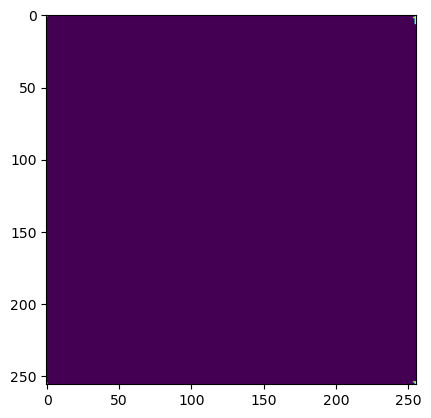

In [38]:
plt.imshow(predicted_mask_squeeze)
plt.show()

In [39]:
np.unique(predicted_mask_squeeze)

array([0, 1])

In [40]:
predicted_mask_squeeze.shape

(256, 256, 1)

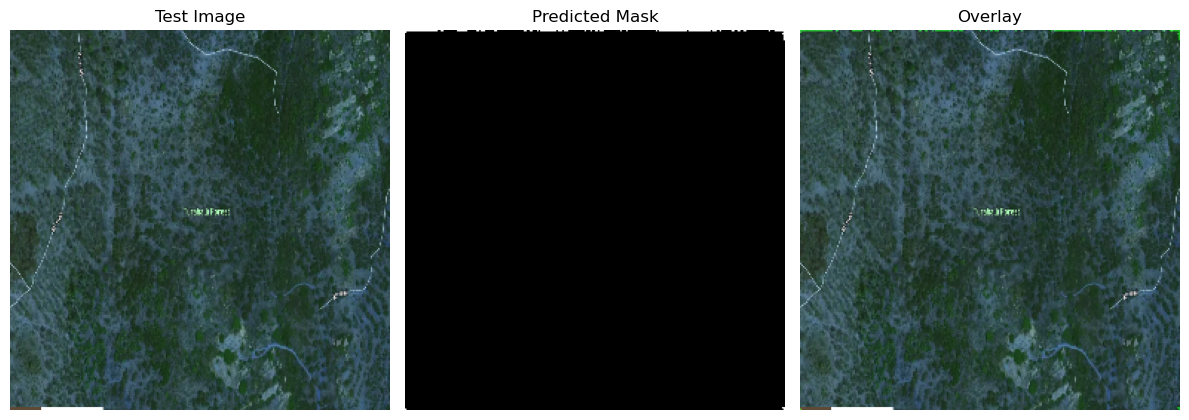

In [41]:
plt.figure(figsize=(12, 6))

# Plot the test image
plt.subplot(1, 3, 1)
plt.imshow(test_image[0])
plt.title('Test Image')
plt.axis('off')

# Plot the predicted mask
plt.subplot(1, 3, 2)
plt.imshow(predicted_mask_squeeze, cmap='gray')
plt.title('Predicted Mask')
plt.axis('off')

# Overlapping the predicted mask on the test image
plt.subplot(1, 3, 3)
overlay = test_image[0].copy()

# Reshaping predicted_mask_binary for boolean indexing
reshaped_mask = np.squeeze(predicted_mask_binary, axis=0)

# Converting reshaped_mask to boolean
boolean_mask = reshaped_mask.astype(bool)

# Checking if there are any True values in the boolean_mask
if np.any(boolean_mask):
    # Creating a 3-channel boolean mask for overlay
    overlay_mask = np.zeros((256, 256, 3), dtype=np.uint8)
    coords = np.where(boolean_mask)
    overlay_mask[coords[0], coords[1], :] = [0, 255, 0]

    # Combining the test image with the overlay mask
    overlay = cv2.addWeighted(overlay, 1, overlay_mask, 0.5, 0)

plt.imshow(overlay)
plt.title('Overlay')
plt.axis('off')

plt.tight_layout()
plt.show()

#### As we can see Predicted mask has 0 and 1 both predictions predicted_mask but can't see any 1 value visually in Predicted mask. This is basically due to lack of training data.

## Part 5 - Performance Comparison

### Using Edge Detection:

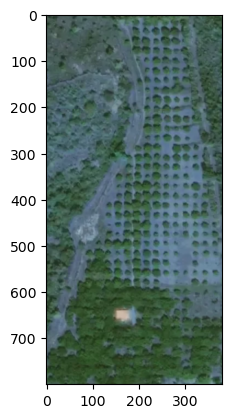

In [42]:
# read input image
image1 = cv2.imread('./train/1.png')
image2 = cv2.imread('./test/2.png')
plt.imshow(image1)
plt.show()

In [43]:
# Convert the  BGR image to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

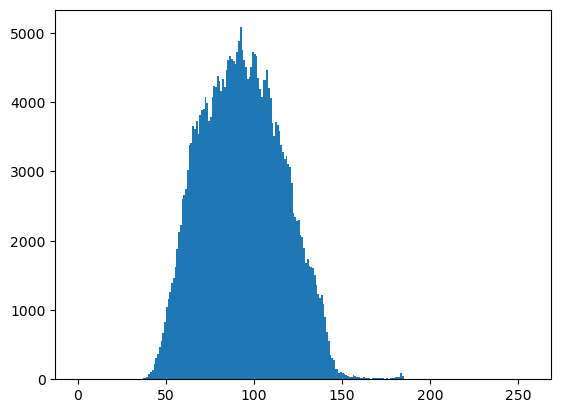

In [44]:
# draw histogram for 1st image
plt.hist(gray1.ravel(), 256,[0, 256])
plt.show()

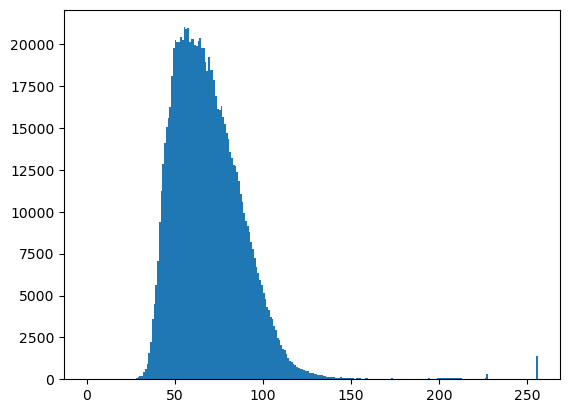

In [45]:
# draw histogram 2nd image
plt.hist(gray2.ravel(), 256,[0, 256])
plt.show()

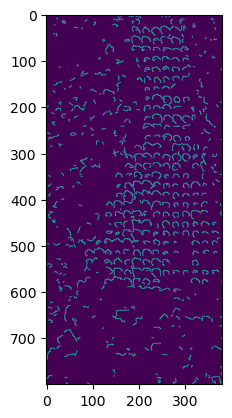

In [46]:
# Apply Canny edge detection on 1st image
edges1 = cv2.Canny(gray1, 100, 150)

plt.imshow(edges1)
plt.show()

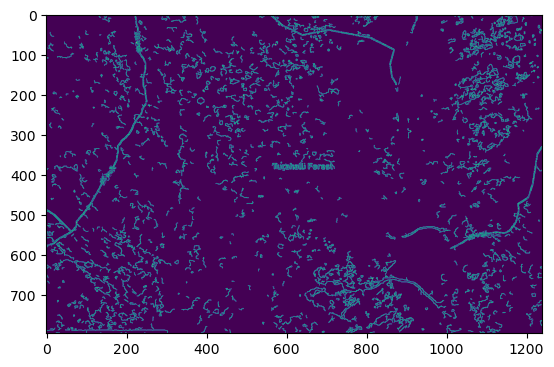

In [47]:
# Apply Canny edge detection on 2nd image
edges2 = cv2.Canny(gray2, 70, 150)

plt.imshow(edges2)
plt.show()

In [48]:
# Finding Contours
# since findContours alters the image
contours1, hierarchy1 = cv2.findContours(edges1.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

print("Number of Contours found = " + str(len(contours1)))

Number of Contours found = 589


In [49]:
contours2, hierarchy2 = cv2.findContours(edges2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Number of Contours found = " + str(len(contours2)))

Number of Contours found = 1550


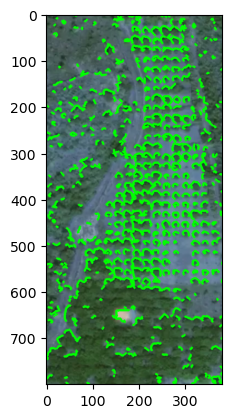

In [50]:
# Draw all contours
# -1 signifies drawing all contours
img1 = image1.copy()
cv2.drawContours(img1, contours1, -1, (0, 255, 0), 3)
  
plt.imshow(img1)
plt.show()

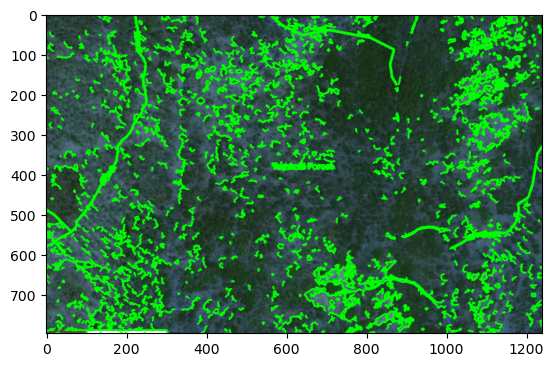

In [51]:
img2 = image2.copy()
cv2.drawContours(img2, contours2, -1, (0, 255, 0), 3)
  
plt.imshow(img2)
plt.show()

#### By using Edge Detection: <br>1. We can get good output even with only 1 image as input.<br>2. We are able to easily identify individual trees but identifying cluster of trees is difficult.